# Text Vectorization

Text Vectorization is the process of converting text into numerical representation.

## [Count Vectorizer](#1)

We'll use one of the simplest ways of doing text vectorization - count vectorizer. It creates a document term matrix, which is a set of dummy variables that indicates if a particular word appears in the document. Count vectorizer will fit and learn the word vocabulary and try to create a document term matrix in which the individual cells denote the frequency of that word in a particular document, which is also known as term frequency, and the columns are dedicated to each word in the corpus.

We can visualize it by this graph:

![](https://miro.medium.com/v2/resize:fit:714/1*UOjWvDziH86T2MmiDpp98Q.png)

## [TF-IDF Vectorizer](#2) 

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.

![](https://miro.medium.com/v2/resize:fit:1400/1*V9ac4hLVyms79jl65Ym_Bw.jpeg)

# Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

# Exploratory Data Analysis

In [3]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


# Model (MultinomialNB)

MultinomialNB is a Naive Bayes classifier for multinomial models.

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

# <a id="1">Count Vectorizer</a>

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

y = train['target']
X = train.drop('target', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

c_vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

c_vectors = c_vectorizer.fit_transform(X_train['text'])

clf = MultinomialNB(alpha=.01)

#  Train the classifier
clf.fit(c_vectors, y_train)

# Get the test vectors
c_vectors_valid = c_vectorizer.transform(X_valid['text'])

# Predict and score the vectors
pred = clf.predict(c_vectors_valid)

acc_score = metrics.accuracy_score(y_valid, pred)
f1_score = metrics.f1_score(y_valid, pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.7672105053720653
Total F1 classification score: 0.7610970226202209


# <a id="2">TF-IDF Vectorizer</a>

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)
tf_vectors = tf_vectorizer.fit_transform(X_train['text'])

clf = MultinomialNB(alpha=.01)

#  Train the classifier
clf.fit(tf_vectors, y_train)

# Get the test vectors
tf_vectors_valid = tf_vectorizer.transform(X_valid['text'])

# Predict and score the vectors
pred = clf.predict(tf_vectors_valid)

acc_score = metrics.accuracy_score(y_valid, pred)
f1_score = metrics.f1_score(y_valid, pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.7695980899323518
Total F1 classification score: 0.7626487516290068


# Classification ANN

In [10]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)
vectors = vectorizer.fit_transform(X['text'])

input_shape = [vectors.shape[1]]

In [11]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid'),
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy',
    metrics=['binary_accuracy'],)

early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    vectors.toarray(), y,
    epochs=50,
    callbacks=[early_stopping],
)

Epoch 1/50
238/238 [==============================] - 29s 110ms/step - loss: 0.5912 - binary_accuracy: 0.7008
Epoch 2/50
238/238 [==============================] - 25s 107ms/step - loss: 0.2841 - binary_accuracy: 0.8857
Epoch 3/50
238/238 [==============================] - 26s 109ms/step - loss: 0.1262 - binary_accuracy: 0.9570
Epoch 4/50
238/238 [==============================] - 26s 109ms/step - loss: 0.0934 - binary_accuracy: 0.9669
Epoch 5/50
238/238 [==============================] - 25s 107ms/step - loss: 0.1066 - binary_accuracy: 0.9614
Epoch 6/50
238/238 [==============================] - 26s 108ms/step - loss: 0.0912 - binary_accuracy: 0.9666
Epoch 7/50
238/238 [==============================] - 25s 106ms/step - loss: 0.0831 - binary_accuracy: 0.9695
Epoch 8/50
238/238 [==============================] - 26s 110ms/step - loss: 0.0956 - binary_accuracy: 0.9647
Epoch 9/50
238/238 [==============================] - 26s 109ms/step - loss: 0.0794 - binary_accuracy: 0.9725
Epoch 10/5

# Evaluation

<AxesSubplot:title={'center':'Accuracy'}>

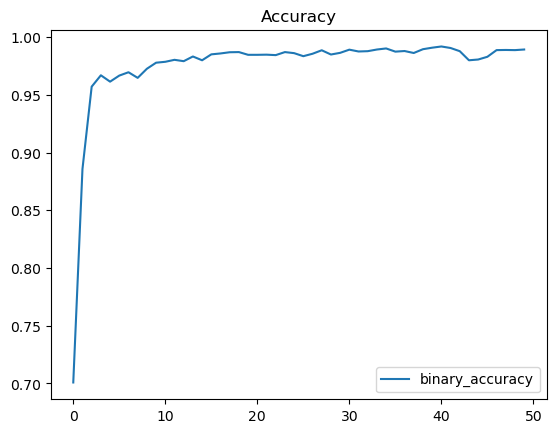

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['binary_accuracy']].plot(title="Accuracy")

# Predictions

In [14]:
df = pd.DataFrame()
df['id'] = test['id']
vectors_test = vectorizer.transform(test['text'])
df['target'] = model.predict(vectors_test.toarray()).round().astype(int)

102/102 [==============================] - 2s 20ms/step


In [15]:
df.to_csv('submission.csv',index=False)